In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from sklearn.cluster import KMeans
from lp_solve import *

In [2]:
from emd import *
from compare_clusters import *
from utils import *

In [3]:
sigms = 1
sigma1 = sigms
sigma2 = sigms
mean1 = np.array([1,1])
mean2 = np.array([-1,-1])


n = 5
m = 5

X1,W1 = generate_data(mean1,sigma1,n)
Y1 = 0+np.zeros(n)
X2,W2 = generate_data(mean2,sigma2,m)
Y2 = 1+np.zeros(m)


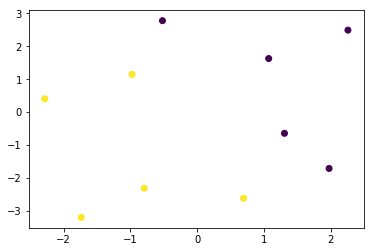

In [4]:
X = np.c_[X1.T,X2.T].T
Y = np.c_[Y1.T,Y2.T].T.reshape(n+m)
plt.scatter(X[:,0],X[:,1],c=Y)

In [5]:
d,A,b = EMD_prob(X1,W1,X1,W1)
write_lpfile(d,A,b)
emd,x1,time = EMD(X1,W1,X1,W1)
print(emd)

0.0


In [11]:
x = np.zeros((n,m))
x[np.arange(n),np.arange(m)] = W1
x = x.reshape(n*m)
x1 = x1.reshape(n*m)
A@x1-b


array([-3.99058564e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.80174836e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.79173860e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.47142228e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.28958347e+00,  5.93969318e-15,  8.88178420e-16, -1.77635684e-15,
       -6.21724894e-15,  0.00000000e+00,  5.93969318e-15,  8.88178420e-16,
       -1.77635684e-15, -6.21724894e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [7]:
def dist(x,y):
    return np.sum(np.abs(x-y))

def euclid(x,y):
    return np.sum((x-y)**2)

d,A,b = EMD_prob(X1,W1,X2,W2)
d1,A1,b1 = EMD_prob(X1,W1,X2,W2,euclid)
write_lpfile(d,A,b)
emd,x,time = EMD(X1,W1,X2,W2)
time


0.36500000953674316

In [8]:
x.sum()

179.00392444119322

In [91]:
sigms = 1
sigma1 = sigms
sigma2 = sigms
mean1 = np.array([1,1])
mean2 = np.array([-1,-1])

ns = np.array([50,60,70,90,110])
ms = np.array([50,60,70,90,110])
num_of_rep = 5

objs = np.zeros((ns.shape[0],ms.shape[0]))
times = np.zeros((ns.shape[0],ms.shape[0]))

for i in tqdm(range(ns.shape[0])):
    n=ns[i]
    for j,m in enumerate(ms):
        if m < n:
            continue
        X1,W1 = generate_data(mean1,sigma1,n)
        X2,W2 = generate_data(mean2,sigma2,m)
        
        current_obj = np.zeros(num_of_rep)
        current_time = np.zeros(num_of_rep)
        for k in range(num_of_rep):
            current_obj[k],_,current_time[k] = EMD(X1,W1,X2,W2)
        objs[i,j],times[i,j] = current_obj.mean(),current_time.mean()
        
timespd = pd.DataFrame(times,index=ns,columns=ms)
timespd.to_pickle("time_q4.pkl")

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [55]:
times = pd.read_pickle("time_q4.pkl")

ns = times.index
ms = times.columns

absis = []
ords = []
for i,n in enumerate(ns):
    for j,m in enumerate(ms):
        if m < n:
            continue
        absis.append(n*m)
        ords.append(times.iloc[i,j])
absis = np.array(absis)
ords = np.array(ords)

In [56]:
ords = ords[absis.argsort()]
absis = absis[absis.argsort()]

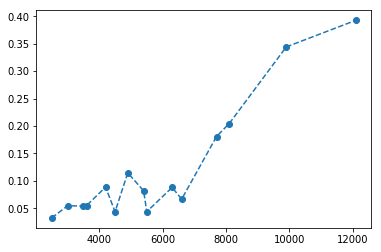

In [68]:
plt.plot(absis,ords,"--o")

In [279]:
mean1 = np.array([1,1])
mean2 = np.array([-1,-1])
mean3 = np.array([1,-1])
mean4 = np.array([-1,1])

std = 0.4
std1 = np.array([[0.2*std,0],
                 [0,std]])
std2 = 0.5*np.array([[std,0.3*std],
                 [0.3*std,std]])
std3 = 0.7*std
std4 = np.array([[std,0],
                 [0,0.1*std]])

size = 200

X1,_ = generate_data(mean=mean1,std=std1,size=size)
X2,_ = generate_data(mean=mean2,std=std2,size=size)
X3,_ = generate_data(mean=mean3,std=std3,size=size)
X4,_ = generate_data(mean=mean4,std=std4,size=size)

Y1 = np.zeros(size)+1
Y2 = np.zeros(size)+2
Y3 = np.zeros(size)+3
Y4 = np.zeros(size)+4

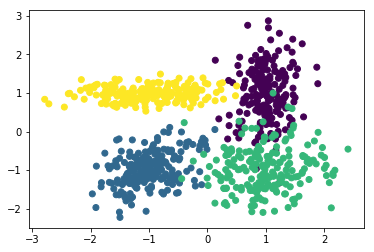

In [280]:
X = np.c_[X1.T,X2.T,X3.T,X4.T].T
Y = np.c_[Y1.T,Y2.T,Y3.T,Y4.T].T.reshape(4*size)
plt.scatter(X[:,0],X[:,1],c=Y)

array([105, 128, 175, 190, 202], dtype=int64)

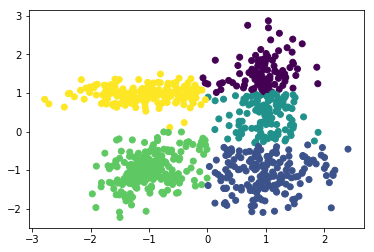

In [295]:
kmeans = KMeans(n_clusters=5,init="random")
clusters = kmeans.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=clusters)
p = np.unique(clusters,return_counts=1)[1]
p.sort()
p

In [350]:
n = X.shape[0]

k1 = 5
c1 = np.zeros((n,k1))
kmeans1 = KMeans(n_clusters=k1,init="random")
clusters1 = kmeans1.fit_predict(X)
c1[np.arange(n),clusters1]=1
c1=c1.T

k2 = 4
c2 = np.zeros((n,k2))
kmeans2 = KMeans(n_clusters=k2,init="random")
clusters2 = kmeans2.fit_predict(X)
c2[np.arange(n),clusters2]=1
c2=c2.T


In [344]:
c1

array([[0., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [358]:
compare_clusters(c1,c1)

(5, 800) (5,) (5, 800) (5,)


337.345

In [334]:
(c1-c2).sum()

0.0

In [21]:
import csv

with open('times_q4.csv', mode='w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(towrite)                                                      


In [20]:
towrite = ["Ns","Ms","Ds","Times","EMDs"]
to_write2 = [1,2,3]
",".join(to_write2)

TypeError: sequence item 0: expected str instance, int found